In [1]:
import pandas as pd
import plotly.express as px

C:\Users\JOLAOLU\Anaconda3\lib\site-packages\distributed\config.py:63: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [2]:
reported_numbers = pd.read_csv(r'C:\Users\JOLAOLU\DS4A\Projecting-Cases\malaria_data\reported_numbers.csv')
estimated_numbers = pd.read_csv(r'C:\Users\JOLAOLU\DS4A\Projecting-Cases\malaria_data\estimated_numbers.csv')
incidence_per_1000_pop_at_risk = pd.read_csv(r'C:\Users\JOLAOLU\DS4A\Projecting-Cases\malaria_data\incidence_per_1000_pop_at_risk.csv')

In [3]:
reported_numbers.head()

Country  Year  No. of cases  No. of deaths             WHO Region
0  Afghanistan  2017      161778.0           10.0  Eastern Mediterranean
1      Algeria  2017           0.0            0.0                 Africa
2       Angola  2017     3874892.0        13967.0                 Africa
3    Argentina  2017           0.0            1.0               Americas
4      Armenia  2017           0.0            NaN                 Europe

In [4]:
estimated_numbers.head()

Country  Year              No. of cases      No. of deaths  \
0  Afghanistan  2017     630308[495000-801000]       298[110-510]   
1      Algeria  2017                         0                  0   
2       Angola  2017  4615605[3106000-6661000]  13316[9970-16600]   
3    Argentina  2017                         0                  0   
4      Armenia  2017                         0                  0   

   No. of cases_median  No. of cases_min  No. of cases_max  \
0               630308          495000.0          801000.0   
1                    0               NaN               NaN   
2              4615605         3106000.0         6661000.0   
3                    0               NaN               NaN   
4                    0               NaN               NaN   

   No. of deaths_median  No. of deaths_min  No. of deaths_max  \
0                   298              110.0              510.0   
1                     0                NaN                NaN   
2                 13316             9970.0            16600.0   
3                     0                NaN                NaN   
4                     0                NaN                NaN   

              WHO Region  
0  Eastern Mediterranean  
1                 Africa  
2                 Africa  
3               Americas  
4                 Europe

In [5]:
incidence_per_1000_pop_at_risk.head()

Country  Year  No. of cases             WHO Region
0  Afghanistan  2018         29.01  Eastern Mediterranean
1      Algeria  2018          0.00                 Africa
2       Angola  2018        228.91                 Africa
3    Argentina  2018          0.00               Americas
4      Armenia  2018          0.00                 Europe

In [6]:
malaria_df = pd.merge(reported_numbers, estimated_numbers,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
malaria_df  = pd.merge(malaria_df, incidence_per_1000_pop_at_risk,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
malaria_df

Country  Year  No. of cases_x  \
0                            Afghanistan  2017        161778.0   
1                                Algeria  2017             0.0   
2                                 Angola  2017       3874892.0   
3                              Argentina  2017             0.0   
4                                Armenia  2017             0.0   
...                                  ...   ...             ...   
1939  Venezuela (Bolivarian Republic of)  2000         29736.0   
1940                            Viet Nam  2000         74316.0   
1941                               Yemen  2000       1394495.0   
1942                              Zambia  2000             NaN   
1943                            Zimbabwe  2000             NaN   

      No. of deaths_x           WHO Region_x            No. of cases_y  \
0                10.0  Eastern Mediterranean     630308[495000-801000]   
1                 0.0                 Africa                         0   
2             13967.0                 Africa  4615605[3106000-6661000]   
3                 1.0               Americas                         0   
4                 NaN                 Europe                         0   
...               ...                    ...                       ...   
1939             24.0               Americas                       NaN   
1940            142.0        Western Pacific                       NaN   
1941              NaN  Eastern Mediterranean                       NaN   
1942              NaN                 Africa                       NaN   
1943              NaN                 Africa                       NaN   

        No. of deaths_y  No. of cases_median  No. of cases_min  \
0          298[110-510]             630308.0          495000.0   
1                     0                  0.0               NaN   
2     13316[9970-16600]            4615605.0         3106000.0   
3                     0                  0.0               NaN   
4                     0                  0.0               NaN   
...                 ...                  ...               ...   
1939                NaN                  NaN               NaN   
1940                NaN                  NaN               NaN   
1941                NaN                  NaN               NaN   
1942                NaN                  NaN               NaN   
1943                NaN                  NaN               NaN   

      No. of cases_max  No. of deaths_median  No. of deaths_min  \
0             801000.0                 298.0              110.0   
1                  NaN                   0.0                NaN   
2            6661000.0               13316.0             9970.0   
3                  NaN                   0.0                NaN   
4                  NaN                   0.0                NaN   
...                ...                   ...                ...   
1939               NaN                   NaN                NaN   
1940               NaN                   NaN                NaN   
1941               NaN                   NaN                NaN   
1942               NaN                   NaN                NaN   
1943               NaN                   NaN                NaN   

      No. of deaths_max           WHO Region_y  No. of cases  \
0                 510.0  Eastern Mediterranean         27.07   
1                   NaN                 Africa          0.00   
2               16600.0                 Africa        228.91   
3                   NaN               Americas          0.00   
4                   NaN                 Europe          0.00   
...                 ...                    ...           ...   
1939                NaN                    NaN          2.94   
1940                NaN                    NaN          3.42   
1941                NaN                    NaN         47.47   
1942                NaN                    NaN        385.65   
1943                NaN                    NaN   

In [7]:
malaria_df =malaria_df.drop(columns =['WHO Region_y', 'WHO Region'])

dict = {'No. of cases_x': 'No. of Reported Cases',
        'No. of deaths_x': 'No. of Reported Deaths',
        'No. of cases_y': 'No. of Estimated Cases',
       'No. of deaths_y': 'No. of Estimated Deaths',
        'No. of cases_median': 'No. of Estimated Cases Median',
        'No. of cases_min': 'No. of Estimated Cases Minimum',
        'No. of cases_max': 'No. of Estimated Cases Maximum',
        'No. of deaths_median': 'No. of Estimated Deaths Median',
        'No. of deaths_min': 'No. of Estimated Deaths Minimum',
        'No. of deaths_max': 'No. of Estimated Deaths Maximum',
       'No. of cases': 'No. of incidence per 1000 pop at risk',
       'WHO Region_x':'WHO Region'}
  
# call rename () method
malaria_df.rename(columns=dict,
          inplace=True)
malaria_df

Country  Year  No. of Reported Cases  \
0                            Afghanistan  2017               161778.0   
1                                Algeria  2017                    0.0   
2                                 Angola  2017              3874892.0   
3                              Argentina  2017                    0.0   
4                                Armenia  2017                    0.0   
...                                  ...   ...                    ...   
1939  Venezuela (Bolivarian Republic of)  2000                29736.0   
1940                            Viet Nam  2000                74316.0   
1941                               Yemen  2000              1394495.0   
1942                              Zambia  2000                    NaN   
1943                            Zimbabwe  2000                    NaN   

      No. of Reported Deaths             WHO Region    No. of Estimated Cases  \
0                       10.0  Eastern Mediterranean     630308[495000-801000]   
1                        0.0                 Africa                         0   
2                    13967.0                 Africa  4615605[3106000-6661000]   
3                        1.0               Americas                         0   
4                        NaN                 Europe                         0   
...                      ...                    ...                       ...   
1939                    24.0               Americas                       NaN   
1940                   142.0        Western Pacific                       NaN   
1941                     NaN  Eastern Mediterranean                       NaN   
1942                     NaN                 Africa                       NaN   
1943                     NaN                 Africa                       NaN   

     No. of Estimated Deaths  No. of Estimated Cases Median  \
0               298[110-510]                       630308.0   
1                          0                            0.0   
2          13316[9970-16600]                      4615605.0   
3                          0                            0.0   
4                          0                            0.0   
...                      ...                            ...   
1939                     NaN                            NaN   
1940                     NaN                            NaN   
1941                     NaN                            NaN   
1942                     NaN                            NaN   
1943                     NaN                            NaN   

      No. of Estimated Cases Minimum  No. of Estimated Cases Maximum  \
0                           495000.0                        801000.0   
1                                NaN                             NaN   
2                          3106000.0                       6661000.0   
3                                NaN                             NaN   
4                                NaN                             NaN   
...                              ...                             ...   
1939                             NaN                             NaN   
1940                             NaN                             NaN   
1941                             NaN                             NaN   
1942                             NaN                             NaN   
1943                             NaN                             NaN   

      No. of Estimated Deaths Median  No. of Estimated Deaths Minimum  \
0                              298.0                            110.0   
1                                0.0                              NaN   
2                            13316.0                           9970.0   
3                                0.0                              NaN   
4                                0.0                              NaN   
...                              ...                              ...   
1939                             NaN              

In [8]:
temperature_data = pd.read_csv(r'C:\Users\JOLAOLU\DS4A\Projecting-Cases\malaria_data\tas_1991_2020.csv')
rainfall_data = pd.read_csv(r'C:\Users\JOLAOLU\DS4A\Projecting-Cases\malaria_data\pr_1991_2020.csv')

In [9]:
rainfall_data

Rainfall - (MM)   Year    Statistics       Country  ISO3
0                 55.2   1991   Jan Average   Afghanistan   AFG
1                 60.1   1991   Feb Average   Afghanistan   AFG
2                106.8   1991   Mar Average   Afghanistan   AFG
3                 49.9   1991   Apr Average   Afghanistan   AFG
4                 53.1   1991   May Average   Afghanistan   AFG
...                ...    ...           ...           ...   ...
70555              1.1   2020   Aug Average      Zimbabwe   ZWE
70556              7.7   2020   Sep Average      Zimbabwe   ZWE
70557             23.5   2020   Oct Average      Zimbabwe   ZWE
70558             74.1   2020   Nov Average      Zimbabwe   ZWE
70559            145.4   2020   Dec Average      Zimbabwe   ZWE

[70560 rows x 5 columns]

In [10]:
climate_df = pd.merge(temperature_data, rainfall_data,  how='left', left_on=[' ISO3',' Year',' Statistics'], right_on = [' ISO3',' Year',' Statistics'])
climate_df


Temperature - (Celsius)   Year    Statistics     Country_x  ISO3  \
0                          0.1   1991   Jan Average   Afghanistan   AFG   
1                          1.4   1991   Feb Average   Afghanistan   AFG   
2                          6.9   1991   Mar Average   Afghanistan   AFG   
3                         12.9   1991   Apr Average   Afghanistan   AFG   
4                         17.0   1991   May Average   Afghanistan   AFG   
...                        ...    ...           ...           ...   ...   
70555                     18.7   2020   Aug Average      Zimbabwe   ZWE   
70556                     22.0   2020   Sep Average      Zimbabwe   ZWE   
70557                     24.3   2020   Oct Average      Zimbabwe   ZWE   
70558                     26.2   2020   Nov Average      Zimbabwe   ZWE   
70559                     24.6   2020   Dec Average      Zimbabwe   ZWE   

       Rainfall - (MM)     Country_y  
0                 55.2   Afghanistan  
1                 60.1   Afghanistan  
2                106.8   Afghanistan  
3                 49.9   Afghanistan  
4                 53.1   Afghanistan  
...                ...           ...  
70555              1.1      Zimbabwe  
70556              7.7      Zimbabwe  
70557             23.5      Zimbabwe  
70558             74.1      Zimbabwe  
70559            145.4      Zimbabwe  

[70560 rows x 7 columns]

In [11]:
climate_df =climate_df.drop(columns =[' Country_y'])

dict = {' Temperature - (Celsius)': 'Temperature - (Celsius)',
        ' Year': 'Year',
        ' Statistics': 'Month',
       ' Country_x': 'Country',
        ' ISO3': 'Country_code',
        ' Rainfall - (MM)': 'Rainfall - (MM)'}
  
# call rename () method
climate_df.rename(columns=dict,
          inplace=True)

#Noticed there are white spaces before each cell so stripping
cols = climate_df.select_dtypes(['object']).columns
climate_df[cols] = climate_df[cols].apply(lambda x: x.str.lstrip())
climate_df

Temperature - (Celsius)  Year        Month      Country Country_code  \
0                          0.1  1991  Jan Average  Afghanistan          AFG   
1                          1.4  1991  Feb Average  Afghanistan          AFG   
2                          6.9  1991  Mar Average  Afghanistan          AFG   
3                         12.9  1991  Apr Average  Afghanistan          AFG   
4                         17.0  1991  May Average  Afghanistan          AFG   
...                        ...   ...          ...          ...          ...   
70555                     18.7  2020  Aug Average     Zimbabwe          ZWE   
70556                     22.0  2020  Sep Average     Zimbabwe          ZWE   
70557                     24.3  2020  Oct Average     Zimbabwe          ZWE   
70558                     26.2  2020  Nov Average     Zimbabwe          ZWE   
70559                     24.6  2020  Dec Average     Zimbabwe          ZWE   

       Rainfall - (MM)  
0                 55.2  
1                 60.1  
2                106.8  
3                 49.9  
4                 53.1  
...                ...  
70555              1.1  
70556              7.7  
70557             23.5  
70558             74.1  
70559            145.4  

[70560 rows x 6 columns]

In [12]:
climate_df = pd.DataFrame(climate_df.groupby(['Year','Country','Country_code'], as_index=False).mean().round(2))
climate_df

Year      Country Country_code  Temperature - (Celsius)  Rainfall - (MM)
0     1991  Afghanistan          AFG                    12.84            33.89
1     1991      Albania          ALB                    10.82            79.23
2     1991      Algeria          DZA                    22.42             7.18
3     1991      Andorra          AND                     8.28            72.08
4     1991       Angola          AGO                    21.63            85.33
...    ...          ...          ...                      ...              ...
5875  2020    Venezuela          VEN                    26.00           154.73
5876  2020      Vietnam          VNM                    25.05           145.23
5877  2020        Yemen          YEM                    23.68            14.60
5878  2020       Zambia          ZMB                    22.08            84.80
5879  2020     Zimbabwe          ZWE                    21.86            54.53

[5880 rows x 5 columns]

In [13]:
#Both South Korea and North Korea show up as 'Korea' so this fixes that

climate_df.loc[(climate_df['Country_code'] == 'PRK'),'Country'] = "Democratic People's Republic of Korea"
climate_df.loc[(climate_df['Country_code'] == 'KOR'),'Country'] = "Republic of Korea"


In [14]:
#Some countries are named different on out malaria data vs climat data. Adjusting the climate data to match the malaria data
rename_dict = {"Bolivia":"Bolivia (Plurinational State of)",
               "Cote d'Ivoire":"Côte d'Ivoire",
               "Congo (Republic of the)":"Congo",
               "Cape Verde":"Cabo Verde",
               "Congo (Democratic Republic of the)":"Democratic Republic of the Congo",
               "Swaziland":"Eswatini",
               "Iran":"Iran (Islamic Republic of)",
               "Laos":"Lao People's Democratic Republic",
               'Myanmar (Burma)' : 'Myanmar',
                'Syria' : 'Syrian Arab Republic',
                'Timor Leste' : 'Timor-Leste',
                'Tanzania' : 'United Republic of Tanzania',
                'Venezuela' : 'Venezuela (Bolivarian Republic of)',
                'Vietnam' : 'Viet Nam'
               
              }
climate_df["Country"] = climate_df["Country"].replace(rename_dict).astype("category")

climate_df

Year                             Country Country_code  \
0     1991                         Afghanistan          AFG   
1     1991                             Albania          ALB   
2     1991                             Algeria          DZA   
3     1991                             Andorra          AND   
4     1991                              Angola          AGO   
...    ...                                 ...          ...   
5875  2020  Venezuela (Bolivarian Republic of)          VEN   
5876  2020                            Viet Nam          VNM   
5877  2020                               Yemen          YEM   
5878  2020                              Zambia          ZMB   
5879  2020                            Zimbabwe          ZWE   

      Temperature - (Celsius)  Rainfall - (MM)  
0                       12.84            33.89  
1                       10.82            79.23  
2                       22.42             7.18  
3                        8.28            72.08  
4                       21.63            85.33  
...                       ...              ...  
5875                    26.00           154.73  
5876                    25.05           145.23  
5877                    23.68            14.60  
5878                    22.08            84.80  
5879                    21.86            54.53  

[5880 rows x 5 columns]

In [15]:
# Joining the malaria dataset and the climate dataset together. The climate 

malaria_climate_df = pd.merge(malaria_df, climate_df,  how='left', left_on=['Country','Year'], right_on = ['Country','Year'])
malaria_climate_df


Country  Year  No. of Reported Cases  \
0                            Afghanistan  2017               161778.0   
1                                Algeria  2017                    0.0   
2                                 Angola  2017              3874892.0   
3                              Argentina  2017                    0.0   
4                                Armenia  2017                    0.0   
...                                  ...   ...                    ...   
1939  Venezuela (Bolivarian Republic of)  2000                29736.0   
1940                            Viet Nam  2000                74316.0   
1941                               Yemen  2000              1394495.0   
1942                              Zambia  2000                    NaN   
1943                            Zimbabwe  2000                    NaN   

      No. of Reported Deaths             WHO Region    No. of Estimated Cases  \
0                       10.0  Eastern Mediterranean     630308[495000-801000]   
1                        0.0                 Africa                         0   
2                    13967.0                 Africa  4615605[3106000-6661000]   
3                        1.0               Americas                         0   
4                        NaN                 Europe                         0   
...                      ...                    ...                       ...   
1939                    24.0               Americas                       NaN   
1940                   142.0        Western Pacific                       NaN   
1941                     NaN  Eastern Mediterranean                       NaN   
1942                     NaN                 Africa                       NaN   
1943                     NaN                 Africa                       NaN   

     No. of Estimated Deaths  No. of Estimated Cases Median  \
0               298[110-510]                       630308.0   
1                          0                            0.0   
2          13316[9970-16600]                      4615605.0   
3                          0                            0.0   
4                          0                            0.0   
...                      ...                            ...   
1939                     NaN                            NaN   
1940                     NaN                            NaN   
1941                     NaN                            NaN   
1942                     NaN                            NaN   
1943                     NaN                            NaN   

      No. of Estimated Cases Minimum  No. of Estimated Cases Maximum  \
0                           495000.0                        801000.0   
1                                NaN                             NaN   
2                          3106000.0                       6661000.0   
3                                NaN                             NaN   
4                                NaN                             NaN   
...                              ...                             ...   
1939                             NaN                             NaN   
1940                             NaN                             NaN   
1941                             NaN                             NaN   
1942                             NaN                             NaN   
1943                             NaN                             NaN   

      No. of Estimated Deaths Median  No. of Estimated Deaths Minimum  \
0                              298.0                            110.0   
1                                0.0                              NaN   
2                            13316.0                           9970.0   
3                                0.0                              NaN   
4                                0.0                              NaN   
...                              ...                              ...   
1939                             NaN              

In [16]:
population = pd.read_csv(r'C:\Users\JOLAOLU\DS4A\Projecting-Cases\malaria_data\Population.csv')
land_area = pd.read_csv(r'C:\Users\JOLAOLU\DS4A\Projecting-Cases\malaria_data\Land_area.csv')

In [17]:
geographical_df = pd.merge(population, land_area,  how='left', left_on=['Country Code','Year'], right_on = ['Country Code','Year'])
geographical_df =geographical_df.drop(columns =['Country Name_y'])
geographical_df = geographical_df.groupby(['Country Code'], as_index = False).apply(lambda group: group.ffill())
geographical_df

Country Name_x Country Code  Year  Population Land Area (sq. km)
0             Aruba          ABW  2000     90853.0                180
1             Aruba          ABW  2001     92898.0                180
2             Aruba          ABW  2002     94992.0                180
3             Aruba          ABW  2003     97017.0                180
4             Aruba          ABW  2004     98737.0                180
...             ...          ...   ...         ...                ...
5247       Zimbabwe          ZWE  2015  13814629.0             386850
5248       Zimbabwe          ZWE  2016  14030390.0             386850
5249       Zimbabwe          ZWE  2017  14236745.0             386850
5250       Zimbabwe          ZWE  2018  14439018.0             386850
5251       Zimbabwe          ZWE  2019  14645468.0             386850

[5252 rows x 5 columns]

In [18]:
#Some countries are named different on out malaria data vs geograhical data. Adjusting the climate data to match the malaria data
rename_dict = {"Bolivia":"Bolivia (Plurinational State of)",
               "Cote d'Ivoire":"Côte d'Ivoire",
               "Congo, Rep.":"Congo",
               "Egypt, Arab Rep.":"Egypt",
               "Congo, Dem. Rep.":"Democratic Republic of the Congo",
               "Gambia, The":"Gambia",
               "Iran, Islamic Rep.":"Iran (Islamic Republic of)",
               "Lao PDR":"Lao People's Democratic Republic",
               'Kyrgyz Republic' : 'Kyrgyzstan',
                'Yemen, Rep.' : 'Yemen',
                'Tanzania' : 'United Republic of Tanzania',
                'Venezuela, RB' : 'Venezuela (Bolivarian Republic of)',
                'Vietnam' : 'Viet Nam',
               'Korea, Rep.':'Republic of Korea',
               'Korea, Dem. People’s Rep.':"Democratic People's Republic of Korea"
               
              }
geographical_df["Country Name_x"] = geographical_df["Country Name_x"].replace(rename_dict).astype("category")

geographical_df

Country Name_x Country Code  Year  Population Land Area (sq. km)
0             Aruba          ABW  2000     90853.0                180
1             Aruba          ABW  2001     92898.0                180
2             Aruba          ABW  2002     94992.0                180
3             Aruba          ABW  2003     97017.0                180
4             Aruba          ABW  2004     98737.0                180
...             ...          ...   ...         ...                ...
5247       Zimbabwe          ZWE  2015  13814629.0             386850
5248       Zimbabwe          ZWE  2016  14030390.0             386850
5249       Zimbabwe          ZWE  2017  14236745.0             386850
5250       Zimbabwe          ZWE  2018  14439018.0             386850
5251       Zimbabwe          ZWE  2019  14645468.0             386850

[5252 rows x 5 columns]

In [19]:
# Joining the malaria dataset and the climate dataset together. The climate 

malaria_climate_geographical_df = pd.merge(malaria_climate_df, geographical_df,  how='left', left_on=['Country','Year'], right_on = ['Country Name_x','Year'])

malaria_climate_geographical_df.drop(columns =['Country_code','Country Name_x'])
malaria_climate_geographical_df



Country  Year  No. of Reported Cases  \
0                            Afghanistan  2017               161778.0   
1                                Algeria  2017                    0.0   
2                                 Angola  2017              3874892.0   
3                              Argentina  2017                    0.0   
4                                Armenia  2017                    0.0   
...                                  ...   ...                    ...   
1939  Venezuela (Bolivarian Republic of)  2000                29736.0   
1940                            Viet Nam  2000                74316.0   
1941                               Yemen  2000              1394495.0   
1942                              Zambia  2000                    NaN   
1943                            Zimbabwe  2000                    NaN   

      No. of Reported Deaths             WHO Region    No. of Estimated Cases  \
0                       10.0  Eastern Mediterranean     630308[495000-801000]   
1                        0.0                 Africa                         0   
2                    13967.0                 Africa  4615605[3106000-6661000]   
3                        1.0               Americas                         0   
4                        NaN                 Europe                         0   
...                      ...                    ...                       ...   
1939                    24.0               Americas                       NaN   
1940                   142.0        Western Pacific                       NaN   
1941                     NaN  Eastern Mediterranean                       NaN   
1942                     NaN                 Africa                       NaN   
1943                     NaN                 Africa                       NaN   

     No. of Estimated Deaths  No. of Estimated Cases Median  \
0               298[110-510]                       630308.0   
1                          0                            0.0   
2          13316[9970-16600]                      4615605.0   
3                          0                            0.0   
4                          0                            0.0   
...                      ...                            ...   
1939                     NaN                            NaN   
1940                     NaN                            NaN   
1941                     NaN                            NaN   
1942                     NaN                            NaN   
1943                     NaN                            NaN   

      No. of Estimated Cases Minimum  No. of Estimated Cases Maximum  ...  \
0                           495000.0                        801000.0  ...   
1                                NaN                             NaN  ...   
2                          3106000.0                       6661000.0  ...   
3                                NaN                             NaN  ...   
4                                NaN                             NaN  ...   
...                              ...                             ...  ...   
1939                             NaN                             NaN  ...   
1940                             NaN                             NaN  ...   
1941                             NaN                             NaN  ...   
1942                             NaN                             NaN  ...   
1943                             NaN                             NaN  ...   

      No. of Estimated Deaths Minimum  No. of Estimated Deaths Maximum  \
0                               110.0                            510.0   
1                                 NaN                              NaN   
2                              9970.0                          16600.0   
3                                 NaN                              NaN   
4                                 NaN                              NaN   
...                               ...                    

In [20]:
malaria_climate_geographical_df[["Population", "Land Area (sq. km)"]] = malaria_climate_geographical_df[["Population", "Land Area (sq. km)"]].apply(pd.to_numeric, errors='coerce')
malaria_climate_geographical_df["Land Area (sq. mi)"] = (malaria_climate_geographical_df["Land Area (sq. km)"]/2.59).round(decimals=2)

malaria_climate_geographical_df['Population Density']= (malaria_climate_geographical_df['Population']/malaria_climate_geographical_df['Land Area (sq. mi)']).round(decimals=2)
malaria_climate_geographical_df['No. of cases per thousand persons']= malaria_climate_geographical_df['No. of Reported Cases']*100000/malaria_climate_geographical_df['Population']


malaria_climate_geographical_df['Temperature - (Farenheit)']= ((malaria_climate_geographical_df['Temperature - (Celsius)'] * 9/5) + 32 ).round(decimals=2)
malaria_climate_geographical_df['Rainfall - (Inches)']= (malaria_climate_geographical_df['Rainfall - (MM)'] /25.4).round(decimals=2)

In [21]:
malaria_climate_geographical_df

Country  Year  No. of Reported Cases  \
0                            Afghanistan  2017               161778.0   
1                                Algeria  2017                    0.0   
2                                 Angola  2017              3874892.0   
3                              Argentina  2017                    0.0   
4                                Armenia  2017                    0.0   
...                                  ...   ...                    ...   
1939  Venezuela (Bolivarian Republic of)  2000                29736.0   
1940                            Viet Nam  2000                74316.0   
1941                               Yemen  2000              1394495.0   
1942                              Zambia  2000                    NaN   
1943                            Zimbabwe  2000                    NaN   

      No. of Reported Deaths             WHO Region    No. of Estimated Cases  \
0                       10.0  Eastern Mediterranean     630308[495000-801000]   
1                        0.0                 Africa                         0   
2                    13967.0                 Africa  4615605[3106000-6661000]   
3                        1.0               Americas                         0   
4                        NaN                 Europe                         0   
...                      ...                    ...                       ...   
1939                    24.0               Americas                       NaN   
1940                   142.0        Western Pacific                       NaN   
1941                     NaN  Eastern Mediterranean                       NaN   
1942                     NaN                 Africa                       NaN   
1943                     NaN                 Africa                       NaN   

     No. of Estimated Deaths  No. of Estimated Cases Median  \
0               298[110-510]                       630308.0   
1                          0                            0.0   
2          13316[9970-16600]                      4615605.0   
3                          0                            0.0   
4                          0                            0.0   
...                      ...                            ...   
1939                     NaN                            NaN   
1940                     NaN                            NaN   
1941                     NaN                            NaN   
1942                     NaN                            NaN   
1943                     NaN                            NaN   

      No. of Estimated Cases Minimum  No. of Estimated Cases Maximum  ...  \
0                           495000.0                        801000.0  ...   
1                                NaN                             NaN  ...   
2                          3106000.0                       6661000.0  ...   
3                                NaN                             NaN  ...   
4                                NaN                             NaN  ...   
...                              ...                             ...  ...   
1939                             NaN                             NaN  ...   
1940                             NaN                             NaN  ...   
1941                             NaN                             NaN  ...   
1942                             NaN                             NaN  ...   
1943                             NaN                             NaN  ...   

      Rainfall - (MM)                      Country Name_x  Country Code  \
0               23.19                         Afghanistan           AFG   
1                6.01                             Algeria           DZA   
2               83.64                              Angola           AGO   
3               49.13                           Argentina           ARG   
4               36.79                             Armenia           ARM   
...               ...                              

In [22]:
# dropping the estimate columns as they contain too many nulls and are merely estimates. It might not be ideal estimating an estimate
malaria_climate_geographical_df =malaria_climate_geographical_df.drop(columns =['No. of Estimated Cases','No. of Estimated Deaths','No. of Estimated Cases Median',
'No. of Estimated Cases Minimum','No. of Estimated Cases Maximum','No. of Estimated Deaths Median','No. of Estimated Deaths Minimum','No. of Estimated Deaths Maximum',
                                                                               'Temperature - (Celsius)','Rainfall - (MM)','Country Name_x','Country_code'])
malaria_climate_geographical_df


Country  Year  No. of Reported Cases  \
0                            Afghanistan  2017               161778.0   
1                                Algeria  2017                    0.0   
2                                 Angola  2017              3874892.0   
3                              Argentina  2017                    0.0   
4                                Armenia  2017                    0.0   
...                                  ...   ...                    ...   
1939  Venezuela (Bolivarian Republic of)  2000                29736.0   
1940                            Viet Nam  2000                74316.0   
1941                               Yemen  2000              1394495.0   
1942                              Zambia  2000                    NaN   
1943                            Zimbabwe  2000                    NaN   

      No. of Reported Deaths             WHO Region  \
0                       10.0  Eastern Mediterranean   
1                        0.0                 Africa   
2                    13967.0                 Africa   
3                        1.0               Americas   
4                        NaN                 Europe   
...                      ...                    ...   
1939                    24.0               Americas   
1940                   142.0        Western Pacific   
1941                     NaN  Eastern Mediterranean   
1942                     NaN                 Africa   
1943                     NaN                 Africa   

      No. of incidence per 1000 pop at risk Country Code  Population  \
0                                     27.07          AFG  36296400.0   
1                                      0.00          DZA  41389198.0   
2                                    228.91          AGO  29816748.0   
3                                      0.00          ARG  44044811.0   
4                                      0.00          ARM   2944809.0   
...                                     ...          ...         ...   
1939                                   2.94          VEN  24192446.0   
1940                                   3.42          VNM  79910412.0   
1941                                  47.47          YEM  17409072.0   
1942                                 385.65          ZMB  10415944.0   
1943                                 123.00          ZWE  11881477.0   

      Land Area (sq. km)  Land Area (sq. mi)  Population Density  \
0               652860.0           252069.50              143.99   
1              2381741.0           919591.12               45.01   
2              1246700.0           481351.35               61.94   
3              2736690.0          1056637.07               41.68   
4                28470.0            10992.28              267.90   
...                  ...                 ...                 ...   
1939            882050.0           340559.85               71.04   
1940            311060.0           120100.39              665.36   
1941            527970.0           203849.42               85.40   
1942            743390.0           287023.17               36.29   
1943            386850.0           149362.93               79.55   

      No. of cases per thousand persons  Temperature - (Farenheit)  \
0                            445.713624                      57.24   
1                              0.000000                      74.28   
2                          12995.689537                      71.42   
3                              0.000000                      58.93   
4                              0.000000                      45.28   
...                                 ...                        ...   
1939                         122.914401                      77.72   
1940                          92.999145                      75.78   
1941                        8010.162747                      74.26   
1942                                NaN                      71.60   
1943                                NaN    

In [23]:

malaria_climate_geographical_df=malaria_climate_geographical_df.dropna(axis=0, 
                    how='any')


In [24]:
malaria_climate_geographical_df.isnull().sum()

Country                                  0
Year                                     0
No. of Reported Cases                    0
No. of Reported Deaths                   0
WHO Region                               0
No. of incidence per 1000 pop at risk    0
Country Code                             0
Population                               0
Land Area (sq. km)                       0
Land Area (sq. mi)                       0
Population Density                       0
No. of cases per thousand persons        0
Temperature - (Farenheit)                0
Rainfall - (Inches)                      0
dtype: int64

In [25]:
malaria_climate_geographical_df.describe()

Year  No. of Reported Cases  No. of Reported Deaths  \
count  1535.000000           1.535000e+03             1535.000000   
mean   2009.173941           3.987302e+05             1020.875570   
std       4.972844           1.271018e+06             3605.795808   
min    2000.000000           0.000000e+00                0.000000   
25%    2005.000000           8.275000e+02                0.000000   
50%    2009.000000           1.576500e+04               21.000000   
75%    2013.000000           1.192075e+05              476.500000   
max    2017.000000           1.533084e+07            51842.000000   

       No. of incidence per 1000 pop at risk    Population  \
count                            1535.000000  1.535000e+03   
mean                               90.158971  5.727252e+07   
std                               143.298578  1.923632e+08   
min                                 0.000000  1.422620e+05   
25%                                 0.585000  4.455534e+06   
50%                                 8.320000  1.268112e+07   
75%                               124.850000  3.470469e+07   
max                               743.510000  1.386395e+09   

       Land Area (sq. km)  Land Area (sq. mi)  Population Density  \
count        1.535000e+03        1.535000e+03         1535.000000   
mean         7.318541e+05        2.825691e+05          273.158117   
std          1.426627e+06        5.508214e+05          399.588960   
min          9.600000e+02        3.706600e+02            5.740000   
25%          7.434000e+04        2.870270e+04           55.325000   
50%          2.576700e+05        9.948649e+04          141.140000   
75%          8.232900e+05        3.178726e+05          301.930000   
max          9.424701e+06        3.638881e+06         3176.970000   

       No. of cases per thousand persons  Temperature - (Farenheit)  \
count                        1535.000000                1535.000000   
mean                         2478.925528                  72.078866   
std                          6438.800155                  10.655129   
min                             0.000000                  34.860000   
25%                             8.615018                  69.665000   
50%                           135.253844                  75.780000   
75%                          1455.831647                  78.560000   
max                         78890.766379                  84.870000   

       Rainfall - (Inches)  
count          1535.000000  
mean              4.382808  
std               2.859086  
min               0.070000  
25%               1.805000  
50%               4.190000  
75%               6.325000  
max              12.210000

In [26]:
#X contains the independent variables(Features) and y contains the dependent variable(Target)
X=malaria_climate_geographical_df.drop(columns = 'No. of Reported Cases')
y=malaria_climate_geographical_df['No. of Reported Cases']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EEBD1E748>,
      dtype=object)

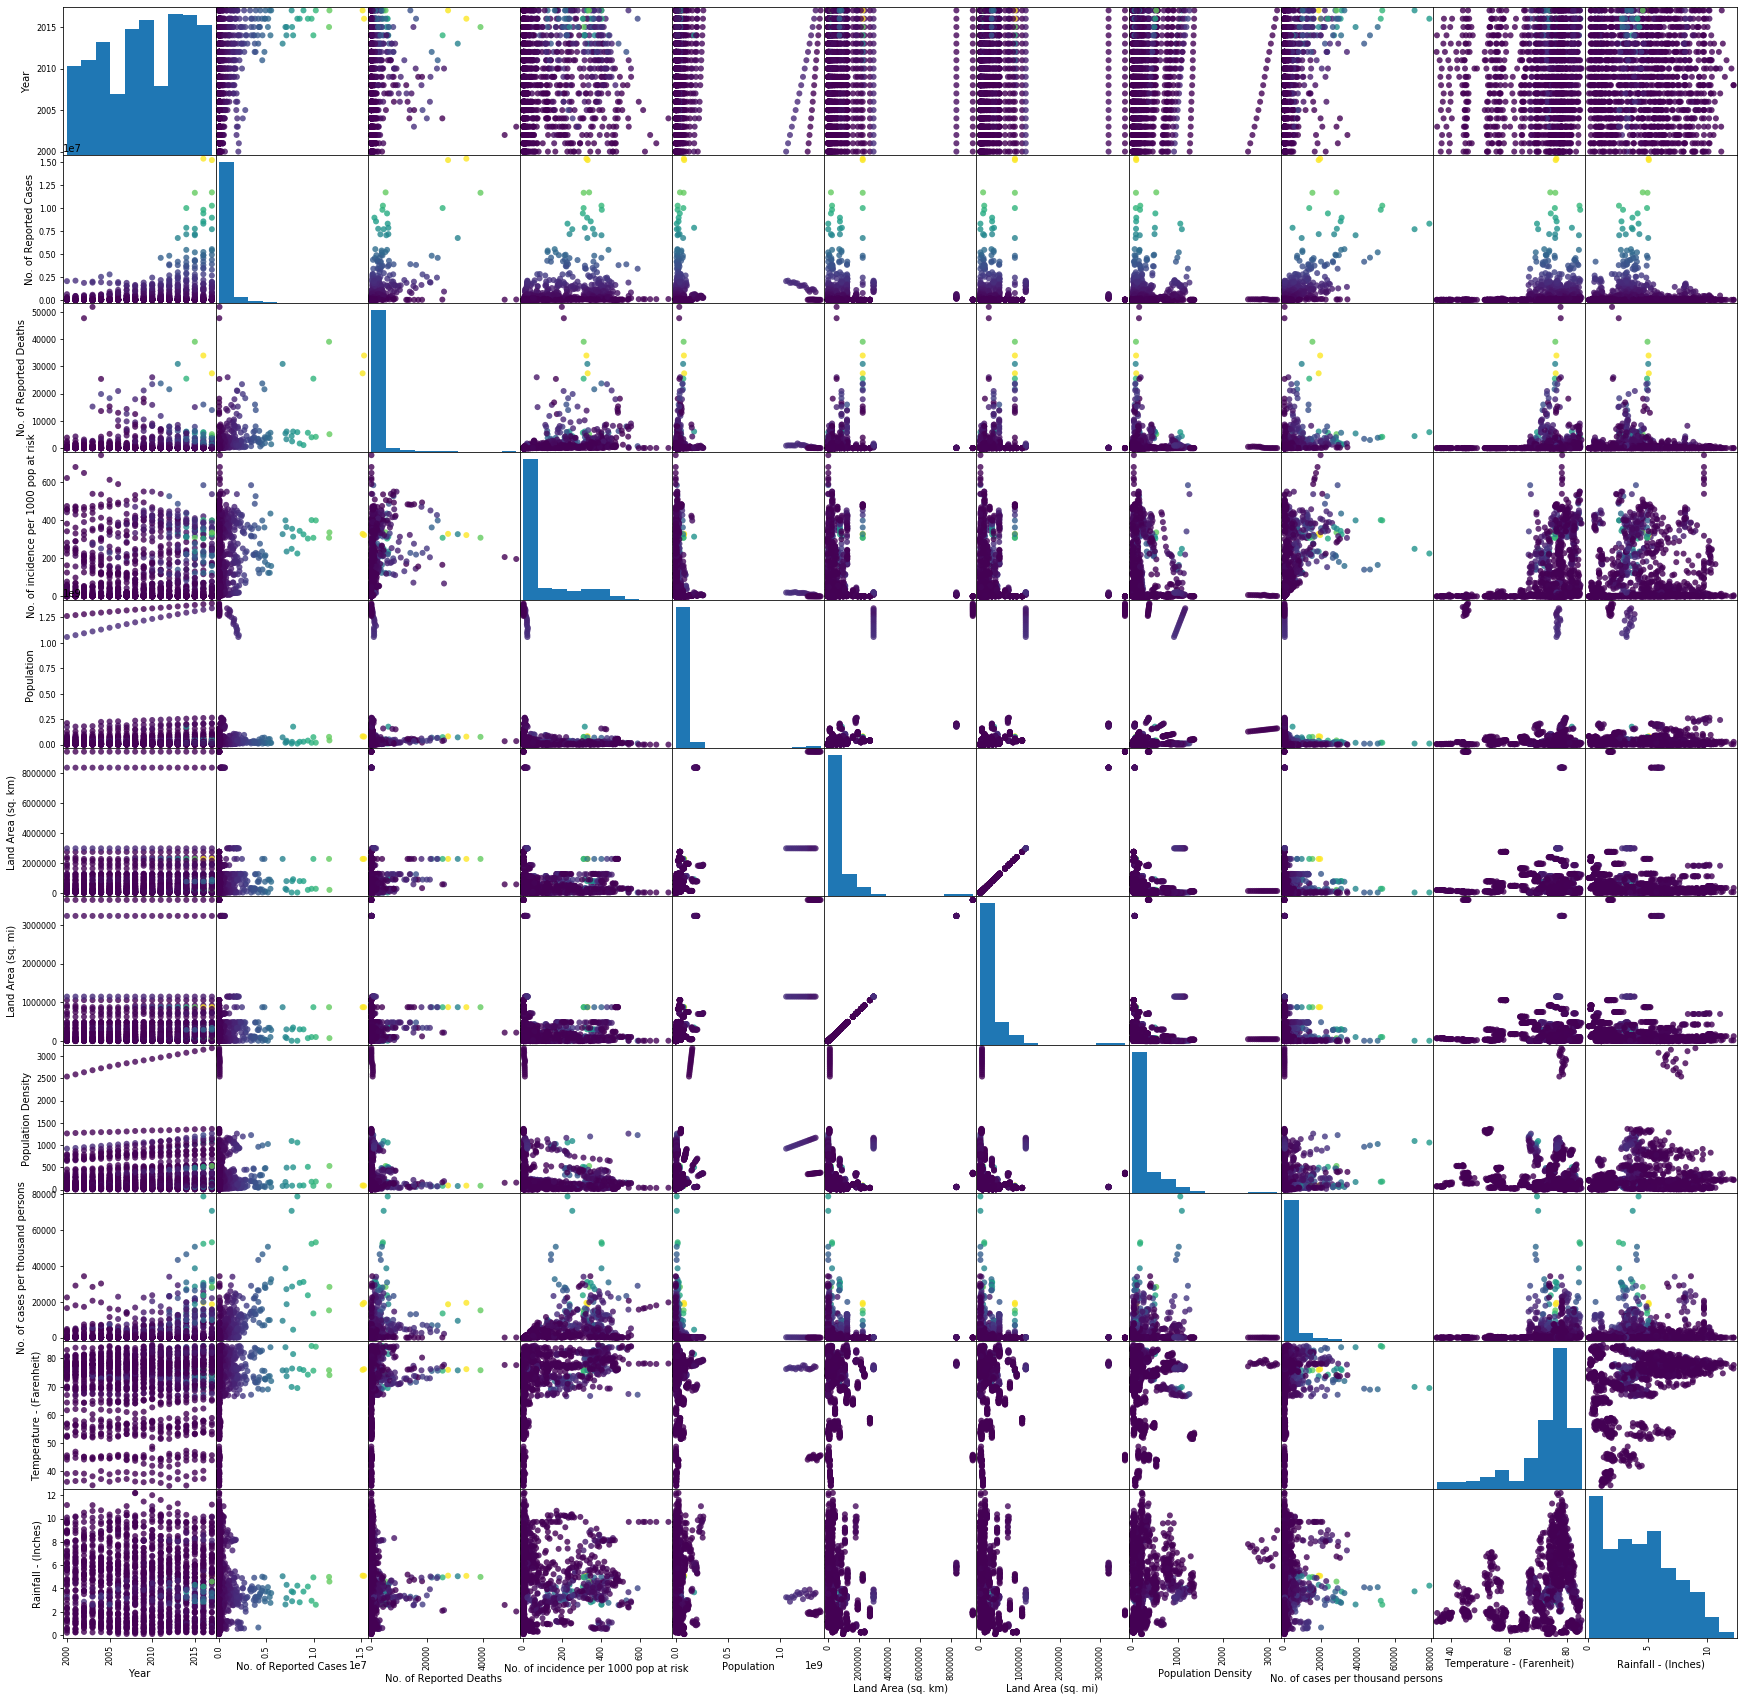

In [27]:
%matplotlib inline
from pandas.plotting import scatter_matrix

features = list(malaria_climate_geographical_df.columns.values)

scatter_matrix(malaria_climate_geographical_df[features], figsize = (30,30), c = y, alpha = 0.8, marker = 'O')

C:\Users\JOLAOLU\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\six.py:31: DeprecationWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

C:\Users\JOLAOLU\AppData\Roaming\Python\Python36\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning:

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022EF3C548D0>,
      dtype=object)

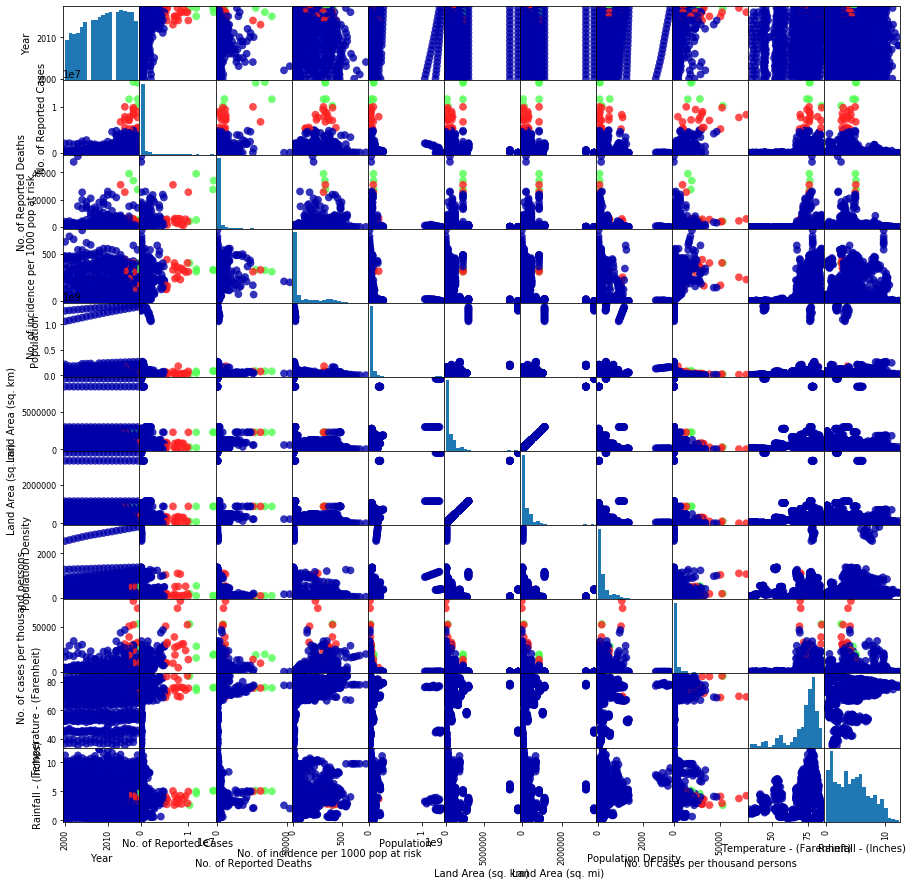

In [28]:
import mglearn


pd.plotting.scatter_matrix(malaria_climate_geographical_df, c=y, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)




In [29]:

fig = px.scatter(malaria_climate_geographical_df, x="Year", y="No. of cases per thousand persons", color="WHO Region",
                 size='Temperature - (Farenheit)', hover_data=['Rainfall - (Inches)','Country'])
fig.show()

In [30]:
fig = px.scatter(malaria_climate_geographical_df, x="Population Density", y="No. of cases per thousand persons", color="WHO Region",
                 size='Temperature - (Farenheit)', hover_data=['Rainfall - (Inches)','Country'])
fig.show()

In [43]:
malaria_climate_geographical_df.head()

Country  Year  No. of Reported Cases  No. of Reported Deaths  \
0  Afghanistan  2017               161778.0                    10.0   
1      Algeria  2017                    0.0                     0.0   
2       Angola  2017              3874892.0                 13967.0   
3    Argentina  2017                    0.0                     1.0   
6   Bangladesh  2017                 4893.0                    13.0   

              WHO Region  No. of incidence per 1000 pop at risk Country Code  \
0  Eastern Mediterranean                                  27.07          AFG   
1                 Africa                                   0.00          DZA   
2                 Africa                                 228.91          AGO   
3               Americas                                   0.00          ARG   
6        South-East Asia                                   1.95          BGD   

    Population  Land Area (sq. km)  Land Area (sq. mi)  Population Density  \
0   36296400.0            652860.0           252069.50              143.99   
1   41389198.0           2381741.0           919591.12               45.01   
2   29816748.0           1246700.0           481351.35               61.94   
3   44044811.0           2736690.0          1056637.07               41.68   
6  159670593.0            130170.0            50258.69             3176.97   

   No. of cases per thousand persons  Temperature - (Farenheit)  \
0                         445.713624                      57.24   
1                           0.000000                      74.28   
2                       12995.689537                      71.42   
3                           0.000000                      58.93   
6                           3.064434                      77.90   

   Rainfall - (Inches)       Date  
0                 0.91 2017-12-31  
1                 0.24 2017-12-31  
2                 3.29 2017-12-31  
3                 1.93 2017-12-31  
6                 9.00 2017-12-31

In [42]:
import datetime, calendar
malaria_climate_geographical_df['Date']= malaria_climate_geographical_df['Year'].astype(str)+'-12'+'-31'
malaria_climate_geographical_df['Date'] = pd.to_datetime(malaria_climate_geographical_df['Date'], format='%Y-%m-%d', errors='coerce')

C:\Users\JOLAOLU\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\JOLAOLU\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [47]:
malaria_climate_geographical_df['Year'].describe()

count    1535.000000
mean     2009.173941
std         4.972844
min      2000.000000
25%      2005.000000
50%      2009.000000
75%      2013.000000
max      2017.000000
Name: Year, dtype: float64

In [50]:
malaria_climate_geographical_df.dtypes

Country                                          object
Year                                              int64
No. of Reported Cases                           float64
No. of Reported Deaths                          float64
WHO Region                                       object
No. of incidence per 1000 pop at risk           float64
Country Code                                     object
Population                                      float64
Land Area (sq. km)                              float64
Land Area (sq. mi)                              float64
Population Density                              float64
No. of cases per thousand persons               float64
Temperature - (Farenheit)                       float64
Rainfall - (Inches)                             float64
Date                                     datetime64[ns]
dtype: object

In [ ]:
# Joining the malaria dataset and the climate dataset together. The climate 

malaria_climate_geographical_df = pd.merge(malaria_climate_df, geographical_df,  how='left', left_on=['Country','Year'], right_on = ['Country Name_x','Year'])

malaria_climate_geographical_df.drop(columns =['Country_code','Country Name_x'])
malaria_climate_geographical_df

